In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv",low_memory=False)

In [3]:
dfOrig = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv",low_memory=False)

In [4]:
df.shape

(364558, 53)

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unique Key,364558.0,NaN,NaN,NaN,31065947.204634,733153.094662,29607374.0,30499378.25,31087947.5,31674327.75,32310649.0
Created Date,364558,362018,02/11/2015 10:56:36 PM,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Closed Date,362177,339837,09/10/2015 07:12:49 AM,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agency,364558,1,NYPD,364558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agency Name,364558,3,New York City Police Department,364548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Complaint Type,364558,24,Blocked Driveway,100881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Descriptor,358057,45,No Access,75888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location Type,364425,18,Street/Sidewalk,301372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Incident Zip,361560.0,NaN,NaN,NaN,10858.496659,578.263114,83.0,10314.0,11209.0,11238.0,11697.0
Incident Address,312859,126372,1207 BEACH AVENUE,1014,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
((df.isna().sum())/len(df))*100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.653120
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.783255
Location Type                       0.036483
Incident Zip                        0.822366
Incident Address                   14.181283
Street Name                        14.181283
Cross Street 1                     15.686941
Cross Street 2                     15.856187
Intersection Street 1              85.977540
Intersection Street 2              86.144317
Address Type                        0.892039
City                                0.822091
Landmark                           99.897136
Facility Type                       0.655314
Status                              0.000000
Due Date                            0.000823
Resolution Description              0.000000
Resolution

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [8]:
df.isna().any()

Unique Key                        False
Created Date                      False
Closed Date                        True
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                         True
Location Type                      True
Incident Zip                       True
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                           True
Resolution Description            False
Resolution Action Updated Date     True
Community Board                   False
Borough                           False


In [9]:
df.isna().apply(pd.value_counts).T

,False,True
Unique Key,364558.0,NaN
Created Date,364558.0,NaN
Closed Date,362177.0,2381.0
Agency,364558.0,NaN
Agency Name,364558.0,NaN
Complaint Type,364558.0,NaN
Descriptor,358057.0,6501.0
Location Type,364425.0,133.0
Incident Zip,361560.0,2998.0
Incident Address,312859.0,51699.0


In [10]:
###################################### Handling Emplty Values ##############################################

In [11]:
# drop columns which do not contribute much to the data
df.drop(['Intersection Street 1'], axis=1, inplace=True)
df.drop(['Intersection Street 2'], axis=1, inplace=True)
df.drop(['Landmark'], axis=1, inplace=True)
df.drop(['School or Citywide Complaint'], axis=1, inplace=True)
df.drop(['Vehicle Type'], axis=1, inplace=True)
df.drop(['Taxi Company Borough'], axis=1, inplace=True)
df.drop(['Taxi Pick Up Location'], axis=1, inplace=True)
df.drop(['Garage Lot Name'], axis=1, inplace=True)
df.drop(['Bridge Highway Direction'], axis=1, inplace=True)
df.drop(['Ferry Direction'], axis=1, inplace=True)
df.drop(['Ferry Terminal Name'], axis=1, inplace=True)
df.drop(['Road Ramp'], axis=1, inplace=True)
df.drop(['Bridge Highway Segment'], axis=1, inplace=True)
df.drop(['Bridge Highway Name'], axis=1, inplace=True)

In [12]:
df.isna().apply(pd.value_counts).T

,False,True
Unique Key,364558.0,NaN
Created Date,364558.0,NaN
Closed Date,362177.0,2381.0
Agency,364558.0,NaN
Agency Name,364558.0,NaN
Complaint Type,364558.0,NaN
Descriptor,358057.0,6501.0
Location Type,364425.0,133.0
Incident Zip,361560.0,2998.0
Incident Address,312859.0,51699.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [14]:
# fill empty values of float columns with their respective medians
df['Incident Zip'] = pd.to_numeric(df['Incident Zip'])
df['X Coordinate (State Plane)'] = pd.to_numeric(df['X Coordinate (State Plane)'])
df['Y Coordinate (State Plane)'] = pd.to_numeric(df['Y Coordinate (State Plane)'])
df['Longitude'] = pd.to_numeric(df['Longitude'])
df['Latitude'] = pd.to_numeric(df['Latitude'])
                                   
df['Incident Zip'].fillna(df['Incident Zip'].median(), inplace=True)
df['X Coordinate (State Plane)'].fillna(df['X Coordinate (State Plane)'].median(), inplace=True)
df['Y Coordinate (State Plane)'].fillna(df['Y Coordinate (State Plane)'].median(), inplace=True)
df['Longitude'].fillna(df['Longitude'].median(), inplace=True)
df['Latitude'].fillna(df['Latitude'].median(), inplace=True)

In [15]:
df['Longitude'].value_counts()

-73.930643    4036
-73.866022    1012
-73.940182     660
-73.809697     637
-73.942073     512
              ... 
-73.912184       1
-73.887652       1
-73.925141       1
-73.957772       1
-73.863752       1
Name: Longitude, Length: 146473, dtype: int64

In [16]:
df['School Zip'].value_counts()

Unspecified    364557
Name: School Zip, dtype: int64

In [17]:
# drop school zip column as all values are of no use
df.drop(['School Zip'], axis=1, inplace=True)

In [18]:
df['School Region'].value_counts()
df['School Code'].value_counts()

Unspecified    364557
Name: School Code, dtype: int64

In [19]:
df.drop(['School Region'], axis=1, inplace=True)
df.drop(['School Code'], axis=1, inplace=True)

In [20]:
df['Resolution Action Updated Date'].value_counts()

12/19/2015 08:35:28 AM    3
07/11/2015 11:28:54 PM    2
06/26/2015 11:33:08 PM    2
11/18/2015 12:12:20 AM    2
07/27/2015 11:48:58 PM    2
                         ..
09/06/2015 02:34:42 AM    1
09/05/2015 10:16:11 PM    1
09/05/2015 09:54:02 PM    1
09/06/2015 12:13:12 AM    1
01/01/2015 02:42:22 AM    1
Name: Resolution Action Updated Date, Length: 340833, dtype: int64

In [21]:
df['Resolution Action Updated Date'].value_counts()

12/19/2015 08:35:28 AM    3
07/11/2015 11:28:54 PM    2
06/26/2015 11:33:08 PM    2
11/18/2015 12:12:20 AM    2
07/27/2015 11:48:58 PM    2
                         ..
09/06/2015 02:34:42 AM    1
09/05/2015 10:16:11 PM    1
09/05/2015 09:54:02 PM    1
09/06/2015 12:13:12 AM    1
01/01/2015 02:42:22 AM    1
Name: Resolution Action Updated Date, Length: 340833, dtype: int64

In [22]:
# change data type to datetime
df['Resolution Action Updated Date'] = pd.to_datetime(df['Resolution Action Updated Date'])

In [23]:
df['Resolution Action Updated Date'].value_counts()

2015-12-19 08:35:28    3
2015-07-11 23:28:54    2
2015-06-26 23:33:08    2
2015-11-18 00:12:20    2
2015-07-27 23:48:58    2
                      ..
2015-09-06 02:34:42    1
2015-09-05 22:16:11    1
2015-09-05 21:54:02    1
2015-09-06 00:13:12    1
2015-01-01 02:42:22    1
Name: Resolution Action Updated Date, Length: 340833, dtype: int64

In [24]:
df['Resolution Action Updated Date'].isna().any()

True

In [25]:
df['Resolution Action Updated Date'].median()

Timestamp('2015-07-16 00:58:48')

In [26]:
df['Resolution Action Updated Date'].fillna(df['Resolution Action Updated Date'].median(), inplace=True)

In [27]:
# change data type to datetime
df['Due Date'] = pd.to_datetime(df['Due Date'])

In [28]:
df['Due Date'].fillna(df['Due Date'].median(), inplace=True)

In [29]:
df['Facility Type'].value_counts()

Precinct    362169
Name: Facility Type, dtype: int64

In [30]:
#drop facility type as all values are same 
df.drop(['Facility Type'],axis=1, inplace=True)

In [31]:
df['City'].fillna('Unknown City', inplace=True)

In [32]:
df['Address Type'].value_counts()

ADDRESS         292699
INTERSECTION     50514
BLOCKFACE        13786
LATLONG           3931
PLACENAME          376
Name: Address Type, dtype: int64

In [33]:
df.dropna(subset=['Address Type'], inplace=True)

In [34]:
df['Cross Street 1'].value_counts()

BEND                              5123
BROADWAY                          5051
3 AVENUE                          4012
5 AVENUE                          3563
7 AVENUE                          3086
                                  ... 
HENRY HUDSON PARKWAY ET 10 SB        1
LINCOLN TUNNEL                       1
RIO DRIVE                            1
BROOKLYN QUEENS EXPWY ET 41 WB       1
UTTER AVENUE                         1
Name: Cross Street 1, Length: 6036, dtype: int64

In [35]:
df['Cross Street 1'].fillna('', inplace=True)

In [36]:
df['Cross Street 2'].fillna('', inplace=True)

In [37]:
df['Street Name'].fillna('', inplace=True)

In [38]:
df['Incident Address'].fillna('', inplace=True)

In [39]:
df['Descriptor'].value_counts()

No Access                         75664
Loud Music/Party                  69012
Posted Parking Sign Violation     26936
Partial Access                    24885
Loud Talking                      23562
With License Plate                21446
Blocked Hydrant                   19741
Commercial Overnight Parking      14656
Blocked Sidewalk                  13643
Car/Truck Music                   11885
Double Parked Blocking Traffic     7014
Engine Idling                      5310
Double Parked Blocking Vehicle     5164
Neglected                          5125
Banging/Pounding                   4885
Car/Truck Horn                     4453
Congestion/Gridlock                3018
Other (complaint details)          2487
In Prohibited Area                 2204
Overnight Commercial Storage       2100
Unlicensed                         1981
Unauthorized Bus Layover           1582
Truck Route Violation              1087
Tortured                           1038
In Public                           964


In [40]:
df['Descriptor'].fillna('', inplace=True)

In [41]:
df['Location Type'].value_counts()

Street/Sidewalk               298881
Store/Commercial               24969
Club/Bar/Restaurant            21363
Residential Building/House      8861
Park/Playground                 4842
House of Worship                1066
Residential Building             533
House and Store                  245
Parking Lot                      167
Commercial                       108
Vacant Lot                        95
Subway Station                    40
Roadway Tunnel                     8
Highway                            6
Name: Location Type, dtype: int64

In [42]:
df['Location Type'].fillna('Street/Sidewalk', inplace=True)

In [43]:
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

In [44]:
df['Closed Date'].fillna(df['Closed Date'].median(), inplace=True)

In [45]:
df['Agency'].value_counts()

NYPD    361306
Name: Agency, dtype: int64

In [46]:
df.drop(['Agency'], axis=1, inplace=True)

In [47]:
df['Agency Name'].value_counts()

New York City Police Department    361305
NYPD                                    1
Name: Agency Name, dtype: int64

In [48]:
df.drop(['Agency Name'], axis=1, inplace=True)

In [49]:
df = df.dropna(subset=['Location'])

In [50]:
df['Created Date'] = pd.to_datetime(df['Created Date'])

In [51]:
df['Descriptor'].value_counts()

No Access                         75624
Loud Music/Party                  68735
Posted Parking Sign Violation     26833
Partial Access                    24879
Loud Talking                      23468
With License Plate                21418
Blocked Hydrant                   19727
Commercial Overnight Parking      14633
Blocked Sidewalk                  13621
Car/Truck Music                   11779
Double Parked Blocking Traffic     6959
                                   6400
Engine Idling                      5262
Neglected                          5117
Double Parked Blocking Vehicle     5083
Banging/Pounding                   4880
Car/Truck Horn                     4439
Congestion/Gridlock                2998
Other (complaint details)          2480
In Prohibited Area                 2198
Overnight Commercial Storage       2092
Unlicensed                         1967
Unauthorized Bus Layover           1579
Truck Route Violation              1083
Tortured                           1036


In [52]:
dfOrig = df.copy(deep=True)

In [53]:
############################## Using label Encoders for categorical data ############################

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [55]:
df['Complaint Type'].value_counts()

Blocked Driveway             100503
Illegal Parking               91103
Noise - Street/Sidewalk       50837
Noise - Commercial            43655
Derelict Vehicle              21418
Noise - Vehicle               19127
Animal Abuse                  10503
Traffic                        4914
Homeless Encampment            4805
Vending                        4165
Noise - Park                   3996
Drinking                       1400
Noise - House of Worship       1061
Posting Advertisement           680
Urinating in Public             641
Bike/Roller/Skate Chronic       463
Panhandling                     320
Disorderly Youth                314
Illegal Fireworks               167
Graffiti                        157
Squeegee                          4
Name: Complaint Type, dtype: int64

In [56]:
df['Complaint Type'] = le.fit_transform(df['Complaint Type'])

In [57]:
df['Complaint Type'].value_counts()

2     100503
9      91103
13     50837
10     43655
3      21418
14     19127
0      10503
18      4914
7       4805
20      4165
12      3996
5       1400
11      1061
16       680
19       641
1        463
15       320
4        314
8        167
6        157
17         4
Name: Complaint Type, dtype: int64

In [58]:
df['Descriptor'] = le.fit_transform(df['Descriptor'])

In [59]:
df['Descriptor'].value_counts()

25    75624
21    68735
34    26833
30    24879
22    23468
41    21418
3     19727
11    14633
4     13621
7     11779
14     6959
0      6400
17     5262
24     5117
15     5083
2      4880
6      4439
12     2998
28     2480
19     2198
29     2092
39     1967
37     1579
36     1083
35     1036
20      963
26      880
8       694
40      601
13      576
38      344
10      339
9       304
18      296
31      272
16      190
33      122
23      113
1        93
5        79
27       42
32       35
Name: Descriptor, dtype: int64

In [60]:
df['Location Type'] = le.fit_transform(df['Location Type'])

In [61]:
df['Address Type'] = le.fit_transform(df['Address Type'])

In [62]:
df['Status'] = le.fit_transform(df['Status'])

In [63]:
df['Resolution Description'] = le.fit_transform(df['Resolution Description'])

In [64]:
df['Borough'] = le.fit_transform(df['Borough'])

In [65]:
df['X Coordinate (State Plane)']

0         1005409.0
1         1007766.0
2         1015081.0
3         1031740.0
4         1019123.0
            ...    
364553    1022809.0
364554    1009923.0
364555     997847.0
364556    1024816.0
364557    1038733.0
Name: X Coordinate (State Plane), Length: 360233, dtype: float64

In [66]:
df.isna().apply(pd.value_counts).T

,False
Unique Key,360233
Created Date,360233
Closed Date,360233
Complaint Type,360233
Descriptor,360233
Location Type,360233
Incident Zip,360233
Incident Address,360233
Street Name,360233
Cross Street 1,360233


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360233 entries, 0 to 364557
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      360233 non-null  int64         
 1   Created Date                    360233 non-null  datetime64[ns]
 2   Closed Date                     360233 non-null  datetime64[ns]
 3   Complaint Type                  360233 non-null  int32         
 4   Descriptor                      360233 non-null  int32         
 5   Location Type                   360233 non-null  int32         
 6   Incident Zip                    360233 non-null  float64       
 7   Incident Address                360233 non-null  object        
 8   Street Name                     360233 non-null  object        
 9   Cross Street 1                  360233 non-null  object        
 10  Cross Street 2                  360233 non-null  object 

In [68]:
########### Analyze date columns ##########

In [69]:
# check for entries with invalid timeline
df[df['Created Date'] > df['Closed Date']]

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,School Name,School Number,School Phone Number,School Address,School City,School State,School Not Found,Latitude,Longitude,Location
2149,32290742,2015-12-29 14:27:24,2015-07-16 01:59:41.500,2,25,11,10016.0,230 EAST 30 STREET,EAST 30 STREET,3 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.742854,-73.979134,"(40.74285387870548, -73.97913408166315)"
4715,32276857,2015-12-26 15:27:13,2015-07-16 01:59:41.500,9,3,11,10019.0,446 WEST 49 STREET,WEST 49 STREET,9 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.763425,-73.990766,"(40.76342452850363, -73.99076591082245)"
9714,32242018,2015-12-20 22:53:09,2015-07-16 01:59:41.500,10,21,10,11221.0,990 BROADWAY,BROADWAY,VERNON AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.696223,-73.933916,"(40.696222550514406, -73.93391550502398)"
12938,32223714,2015-12-17 18:46:39,2015-07-16 01:59:41.500,3,41,11,10470.0,410 EAST 240 STREET,EAST 240 STREET,MARTHA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.901292,-73.864931,"(40.90129235416805, -73.8649308093856)"
16703,32193279,2015-12-13 22:24:59,2015-07-16 01:59:41.500,10,22,10,10472.0,1207 BEACH AVENUE,BEACH AVENUE,GLEASON AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.830362,-73.866022,"(40.83036235589997, -73.86602154214397)"
17558,32190330,2015-12-13 02:07:52,2015-07-16 01:59:41.500,13,21,11,10451.0,281 EAST 153 STREET,EAST 153 STREET,MORRIS AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.820065,-73.920930,"(40.8200654920538, -73.92093038507446)"
18513,32186590,2015-12-12 14:47:35,2015-07-16 01:59:41.500,13,21,11,10026.0,,,,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.802855,-73.954767,"(40.80285510851332, -73.95476661278263)"
18945,32184523,2015-12-12 04:31:29,2015-07-16 01:59:41.500,2,25,11,11418.0,86-27 107 STREET,107 STREET,86 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.696911,-73.841103,"(40.696911350396604, -73.84110339230233)"
20759,32171861,2015-12-10 17:49:27,2015-07-16 01:59:41.500,13,22,11,10472.0,,,,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.829931,-73.865914,"(40.829931310404646, -73.86591400513787)"
20804,32171381,2015-12-10 17:03:14,2015-07-16 01:59:41.500,9,14,11,10009.0,BARUCH DRIVE,BARUCH DRIVE,,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.720113,-73.976948,"(40.72011316746787, -73.97694781669514)"


In [70]:
# drop these rows as closed date cannot be earlier than created date
df.drop(df[df['Created Date'] > df['Closed Date']].index, inplace=True)

In [71]:
df.isna().apply(pd.value_counts).T

,False
Unique Key,360186
Created Date,360186
Closed Date,360186
Complaint Type,360186
Descriptor,360186
Location Type,360186
Incident Zip,360186
Incident Address,360186
Street Name,360186
Cross Street 1,360186


In [72]:
##################Frequency plot of citywise complaints#################

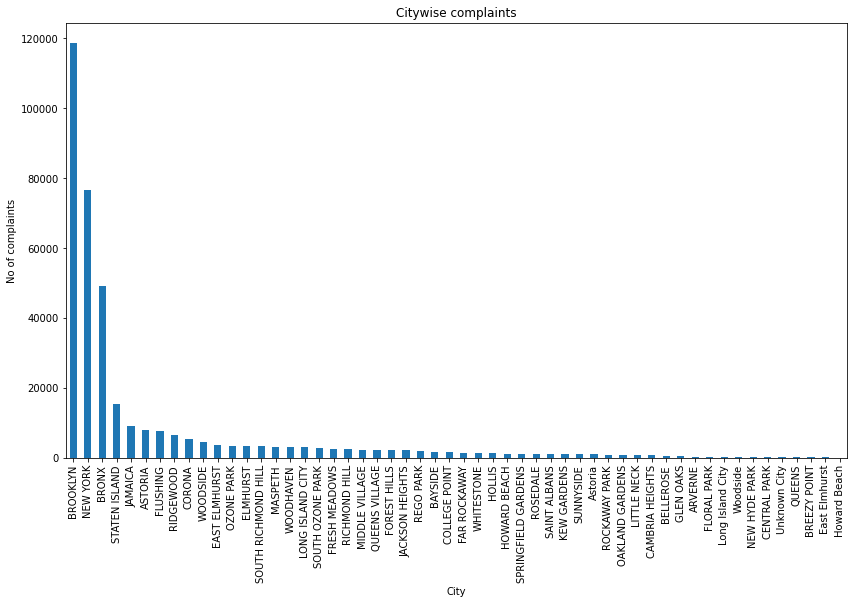

In [73]:
plt.figure(figsize=(14,8))
plt.title("Citywise complaints")
plt.xlabel("City")
plt.ylabel("No of complaints")
df['City'].value_counts().plot(kind="bar")
plt.show()

In [74]:
import seaborn as sns

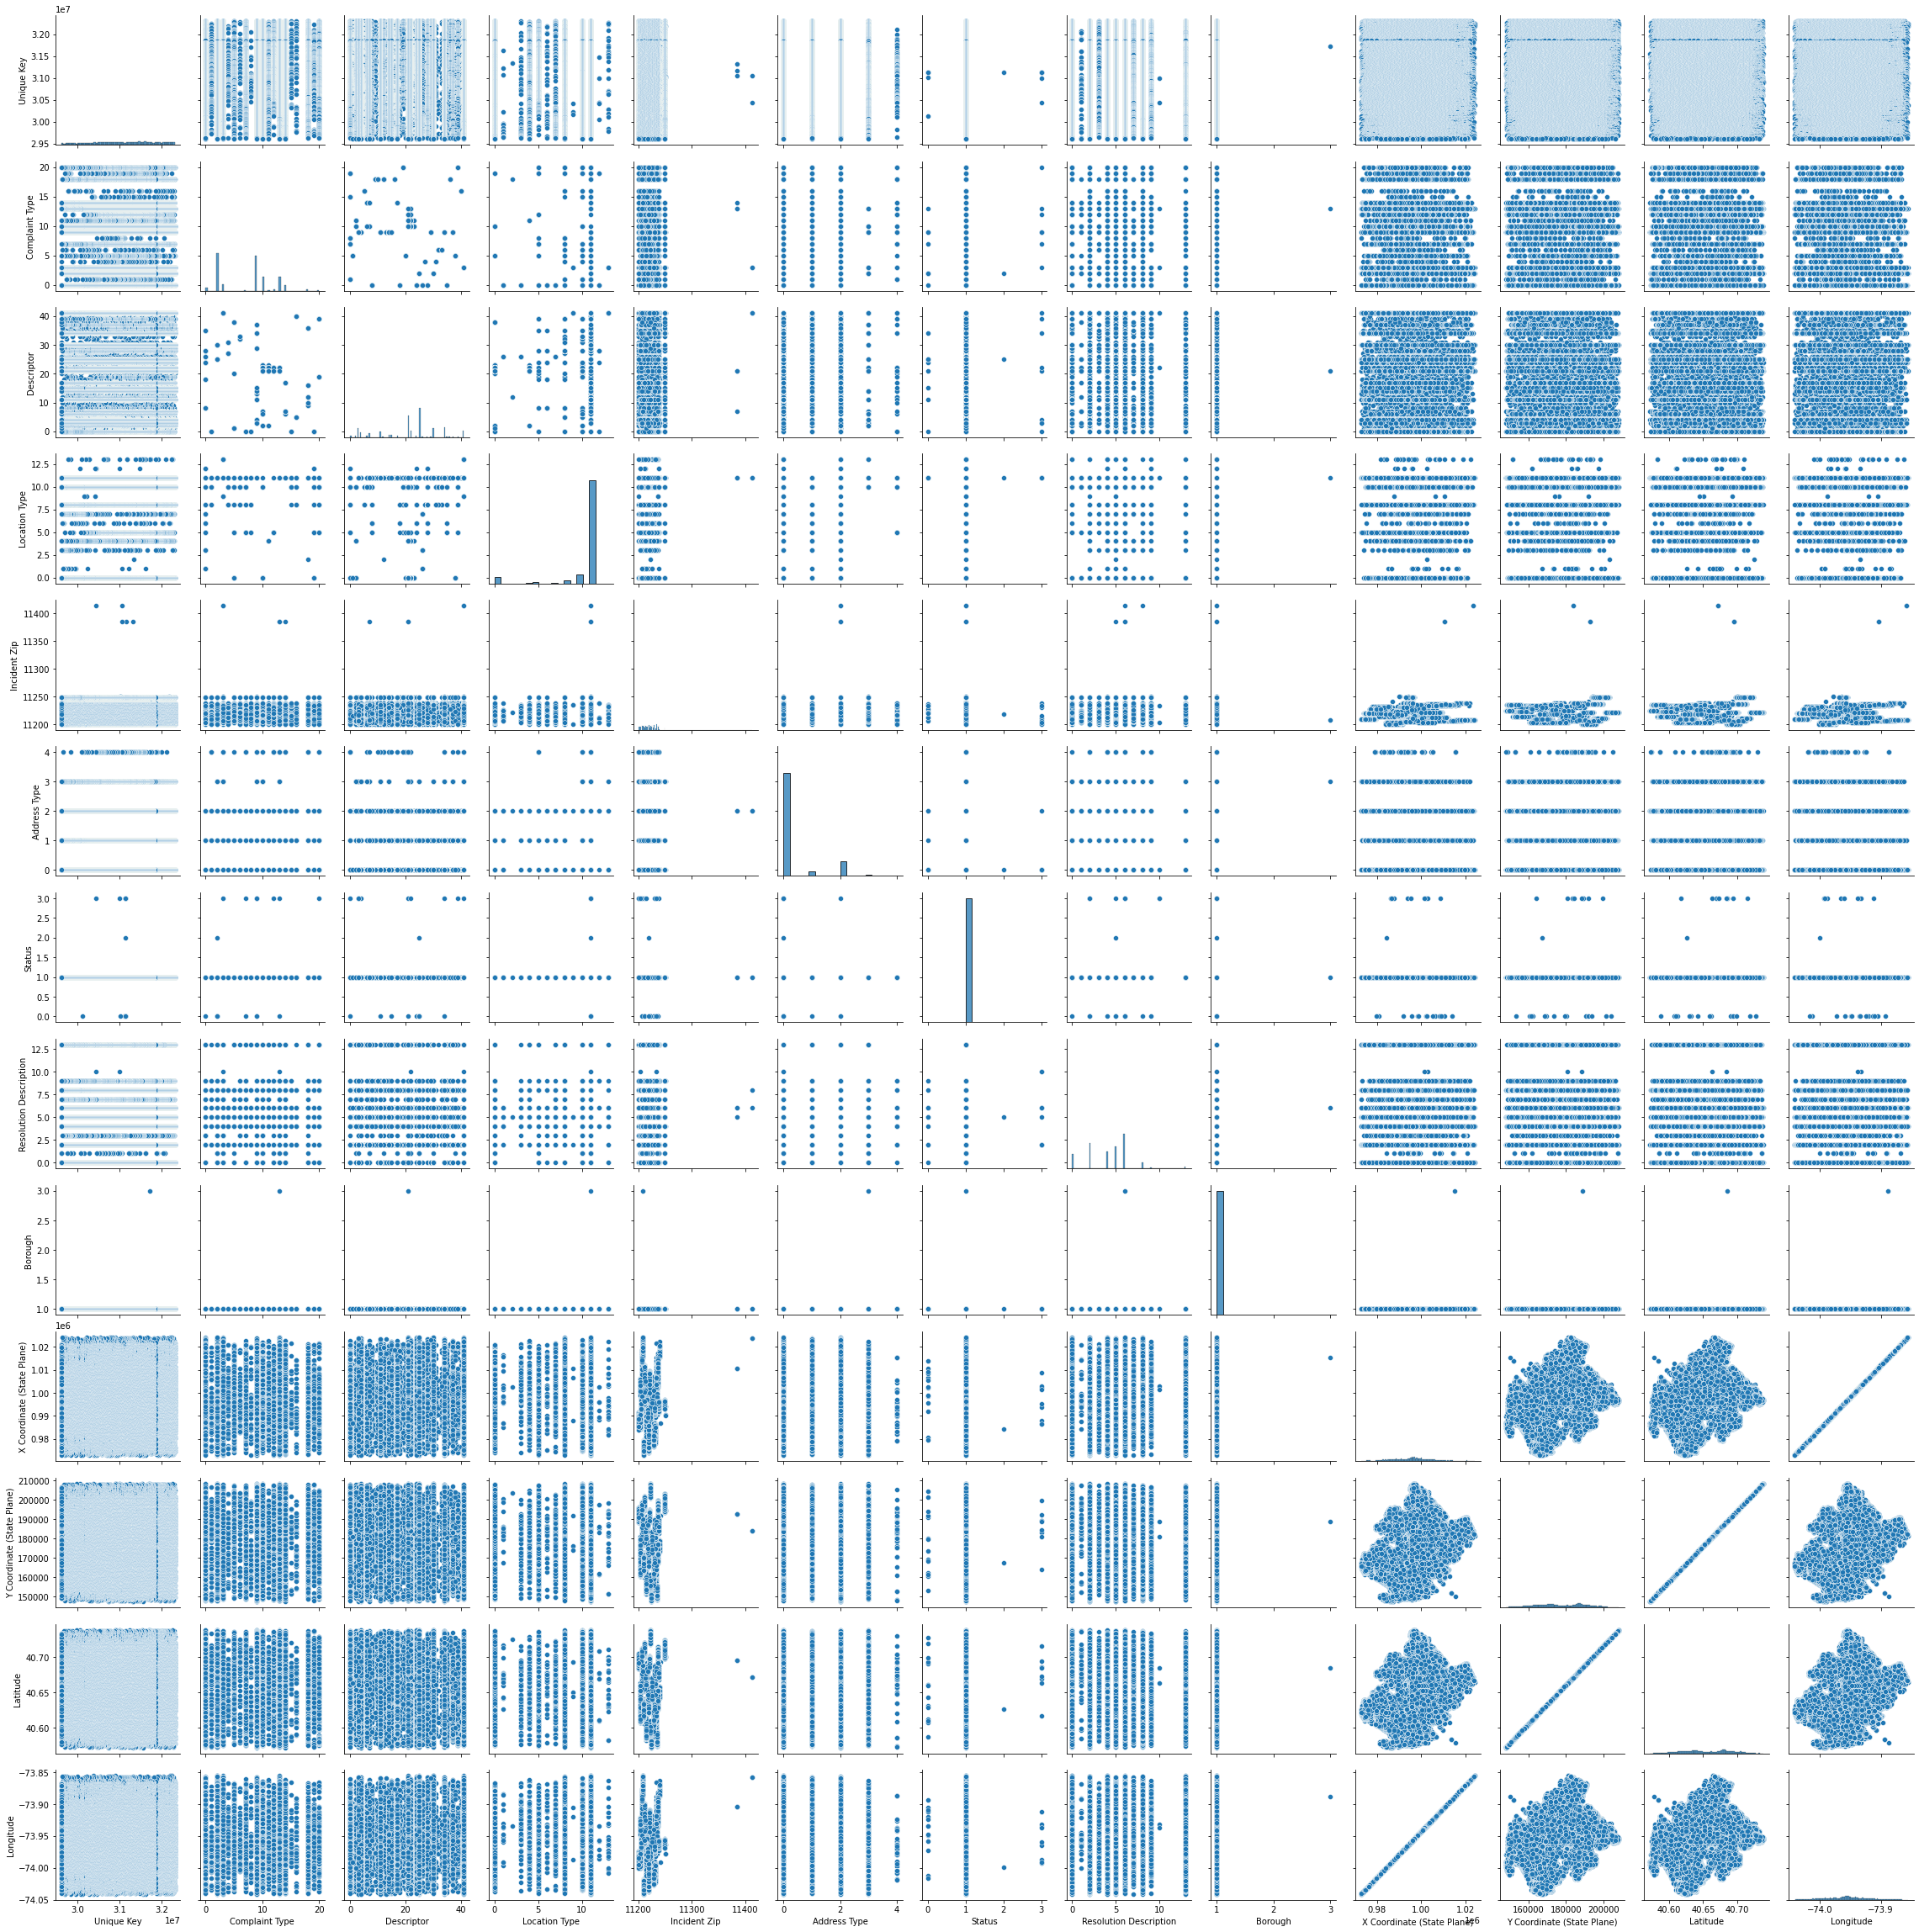

In [75]:

sns.pairplot(df[df['City'] == "BROOKLYN"])

In [121]:
df_Brooklyn = df[df["City"]=="BROOKLYN"]

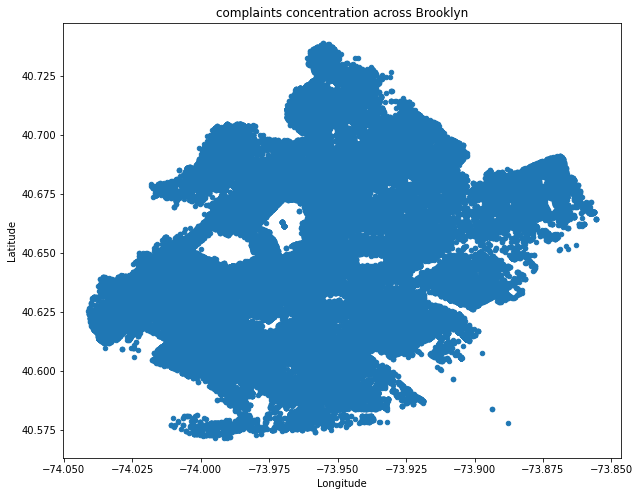

In [123]:
# scatter plot for complaints across BROOKLYN
df_Brooklyn.plot(kind='scatter', x="Longitude", y="Latitude", figsize=(10,8),title="complaints concentration across Brooklyn")
plt.show()

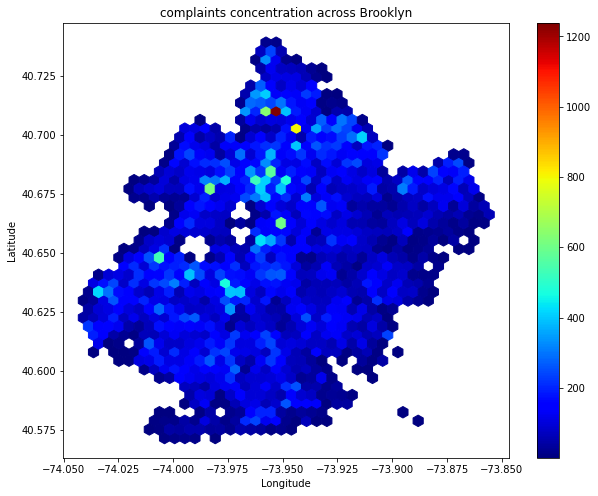

In [131]:
# hexbin plot for complaints across BROOKLYN
df_Brooklyn.plot(kind='hexbin', x="Longitude", y="Latitude", figsize=(10,8),title="complaints concentration across Brooklyn",
                 colormap = 'jet', mincnt=1, sharex=False, gridsize=40)
plt.show()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360186 entries, 0 to 364557
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      360186 non-null  int64         
 1   Created Date                    360186 non-null  datetime64[ns]
 2   Closed Date                     360186 non-null  datetime64[ns]
 3   Complaint Type                  360186 non-null  int32         
 4   Descriptor                      360186 non-null  int32         
 5   Location Type                   360186 non-null  int32         
 6   Incident Zip                    360186 non-null  float64       
 7   Incident Address                360186 non-null  object        
 8   Street Name                     360186 non-null  object        
 9   Cross Street 1                  360186 non-null  object        
 10  Cross Street 2                  360186 non-null  object 

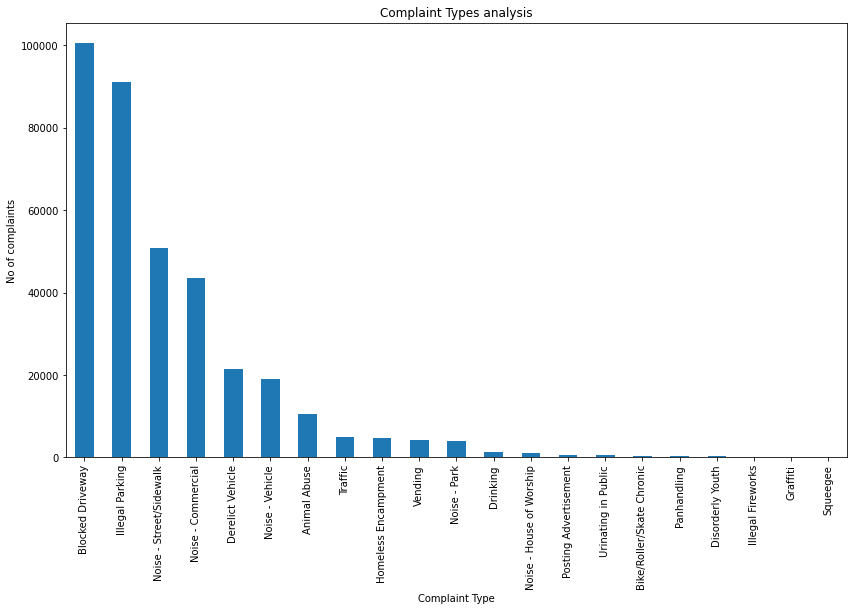

In [78]:
# bar graph of count vs complaint types
plt.figure(figsize=(14,8))
plt.title("Complaint Types analysis")
plt.xlabel("Complaint Type")
plt.ylabel("No of complaints")
dfOrig['Complaint Type'].value_counts().plot(kind="bar")
plt.show()

In [81]:
# Top 10 complaint Types
dfOrig['Complaint Type'].value_counts().head(10)

Blocked Driveway           100503
Illegal Parking             91103
Noise - Street/Sidewalk     50837
Noise - Commercial          43655
Derelict Vehicle            21418
Noise - Vehicle             19127
Animal Abuse                10503
Traffic                      4914
Homeless Encampment          4805
Vending                      4165
Name: Complaint Type, dtype: int64

In [87]:
citywise_complain_types = dfOrig[['City', 'Complaint Type']].copy(deep=True)

In [88]:
citywise_complain_types

,City,Complaint Type
0,NEW YORK,Noise - Street/Sidewalk
1,ASTORIA,Blocked Driveway
2,BRONX,Blocked Driveway
3,BRONX,Illegal Parking
4,ELMHURST,Illegal Parking
...,...,...
364553,WOODHAVEN,Illegal Parking
364554,BRONX,Noise - Vehicle
364555,NEW YORK,Noise - Street/Sidewalk
364556,BRONX,Blocked Driveway


In [132]:
complain_types1 = citywise_complain_types.groupby(['City', 'Complaint Type'])

In [133]:
complain_types1.first()

Empty DataFrame
Columns: []
Index: [(ARVERNE, Animal Abuse), (ARVERNE, Blocked Driveway), (ARVERNE, Derelict Vehicle), (ARVERNE, Disorderly Youth), (ARVERNE, Drinking), (ARVERNE, Graffiti), (ARVERNE, Homeless Encampment), (ARVERNE, Illegal Parking), (ARVERNE, Noise - Commercial), (ARVERNE, Noise - House of Worship), (ARVERNE, Noise - Park), (ARVERNE, Noise - Street/Sidewalk), (ARVERNE, Noise - Vehicle), (ARVERNE, Panhandling), (ARVERNE, Traffic), (ARVERNE, Urinating in Public), (ARVERNE, Vending), (ASTORIA, Animal Abuse), (ASTORIA, Bike/Roller/Skate Chronic), (ASTORIA, Blocked Driveway), (ASTORIA, Derelict Vehicle), (ASTORIA, Disorderly Youth), (ASTORIA, Drinking), (ASTORIA, Graffiti), (ASTORIA, Homeless Encampment), (ASTORIA, Illegal Fireworks), (ASTORIA, Illegal Parking), (ASTORIA, Noise - Commercial), (ASTORIA, Noise - House of Worship), (ASTORIA, Noise - Park), (ASTORIA, Noise - Street/Sidewalk), (ASTORIA, Noise - Vehicle), (ASTORIA, Panhandling), (ASTORIA, Posting Advertisement), (ASTORIA, Traffic), (ASTORIA, Urinating in Public), (ASTORIA, Vending), (Astoria, Blocked Driveway), (Astoria, Derelict Vehicle), (Astoria, Illegal Parking), (Astoria, Noise - Commercial), (Astoria, Noise - Street/Sidewalk), (BAYSIDE, Animal Abuse), (BAYSIDE, Blocked Driveway), (BAYSIDE, Derelict Vehicle), (BAYSIDE, Disorderly Youth), (BAYSIDE, Drinking), (BAYSIDE, Graffiti), (BAYSIDE, Homeless Encampment), (BAYSIDE, Illegal Parking), (BAYSIDE, Noise - Commercial), (BAYSIDE, Noise - House of Worship), (BAYSIDE, Noise - Park), (BAYSIDE, Noise - Street/Sidewalk), (BAYSIDE, Noise - Vehicle), (BAYSIDE, Traffic), (BAYSIDE, Vending), (BELLEROSE, Animal Abuse), (BELLEROSE, Bike/Roller/Skate Chronic), (BELLEROSE, Blocked Driveway), (BELLEROSE, Derelict Vehicle), (BELLEROSE, Disorderly Youth), (BELLEROSE, Drinking), (BELLEROSE, Homeless Encampment), (BELLEROSE, Illegal Fireworks), (BELLEROSE, Illegal Parking), (BELLEROSE, Noise - Commercial), (BELLEROSE, Noise - House of Worship), (BELLEROSE, Noise - Park), (BELLEROSE, Noise - Street/Sidewalk), (BELLEROSE, Noise - Vehicle), (BELLEROSE, Panhandling), (BELLEROSE, Posting Advertisement), (BELLEROSE, Traffic), (BELLEROSE, Urinating in Public), (BREEZY POINT, Animal Abuse), (BREEZY POINT, Blocked Driveway), (BREEZY POINT, Derelict Vehicle), (BREEZY POINT, Drinking), (BREEZY POINT, Illegal Parking), (BREEZY POINT, Noise - Commercial), (BREEZY POINT, Noise - Street/Sidewalk), (BREEZY POINT, Noise - Vehicle), (BRONX, Animal Abuse), (BRONX, Bike/Roller/Skate Chronic), (BRONX, Blocked Driveway), (BRONX, Derelict Vehicle), (BRONX, Disorderly Youth), (BRONX, Drinking), (BRONX, Graffiti), (BRONX, Homeless Encampment), (BRONX, Illegal Fireworks), (BRONX, Illegal Parking), (BRONX, Noise - Commercial), (BRONX, Noise - House of Worship), (BRONX, Noise - Park), (BRONX, Noise - Street/Sidewalk), (BRONX, Noise - Vehicle), (BRONX, Panhandling), (BRONX, Posting Advertisement), ...]

[780 rows x 0 columns]

In [102]:
complain_types1.first()

,Complaint Type
City,
ARVERNE,Illegal Parking
ASTORIA,Blocked Driveway
Astoria,Illegal Parking
BAYSIDE,Blocked Driveway
BELLEROSE,Derelict Vehicle
BREEZY POINT,Noise - Street/Sidewalk
BRONX,Blocked Driveway
BROOKLYN,Illegal Parking
CAMBRIA HEIGHTS,Derelict Vehicle


In [111]:
############# visualize complaint type for each city ############

In [138]:
city_vs_complaints = complain_types1.size().unstack().fillna(0)

In [144]:
city_vs_complaints.shape

(54, 21)

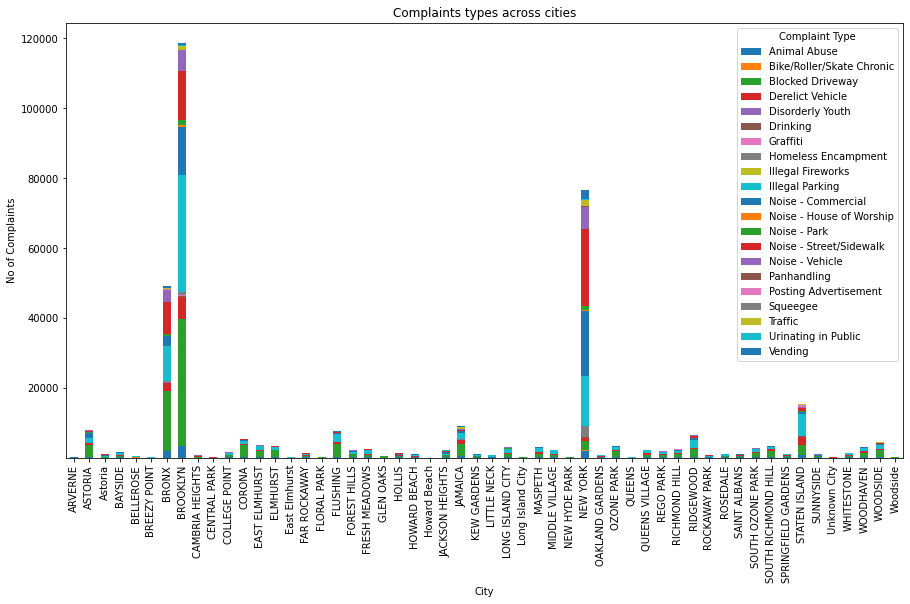

In [145]:
city_vs_complaints.plot(kind="bar", figsize=(15,8), stacked=True, title="Complaints types across cities", ylabel="No of Complaints")
plt.show()

In [193]:
dfOrig.drop(dfOrig[dfOrig['Created Date'] > dfOrig['Closed Date']].index, inplace=True)

In [194]:
# create response time column
dfOrig['Response Time'] = dfOrig['Closed Date'] - dfOrig['Created Date']
dfOrig.head(5)

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,School Number,School Phone Number,School Address,School City,School State,School Not Found,Latitude,Longitude,Location,Response Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:30
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:13
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:34
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:27
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:44


In [195]:
# Convert response time to hours
dfOrig['Response Time'] = dfOrig['Response Time'] / pd.Timedelta(hours=1)

In [196]:
dfOrig.head(5)

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,School Number,School Phone Number,School Address,School City,School State,School Not Found,Latitude,Longitude,Location,Response Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0.925000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",1.453611
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",4.859444
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",7.757500
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",3.462222


In [197]:
response_time_data = dfOrig[['Complaint Type', 'Response Time']]


In [198]:
response_time_data

,Complaint Type,Response Time
0,Noise - Street/Sidewalk,0.925000
1,Blocked Driveway,1.453611
2,Blocked Driveway,4.859444
3,Illegal Parking,7.757500
4,Illegal Parking,3.462222
...,...,...
364553,Illegal Parking,10.296389
364554,Noise - Vehicle,2.342778
364555,Noise - Street/Sidewalk,0.317500
364556,Blocked Driveway,2.681389


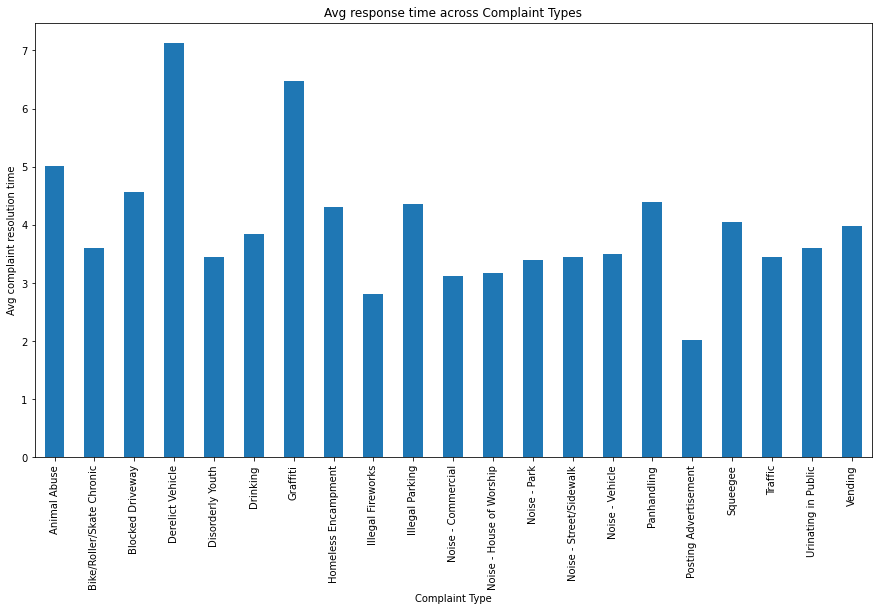

In [202]:
response_time_data.groupby('Complaint Type')['Response Time'].mean().plot(kind="bar", 
                      title="Avg response time across Complaint Types", figsize=(15,8), ylabel = "Avg complaint resolution time")
plt.show()